<!--#  **ML Campus Batch Aug 2022 - Bangalore**
### Assignment 4 --> 
Generating "fake English" text from an RNN's 
#### -by using shakespeare text.
<!--
###### submitted by: Neeraj Ganji 
###### submitted on: 26th sep 2022

ID: 23133
-->

### Loading, Understading, Embedding the dataset and making it useful for making for RNN Models

##### Importing required libraries


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

##### Importing Shakespeare Dataset given in the assignment


In [2]:
!wget 'https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt'

--2022-09-27 15:38:43--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: ‘shakespeare_input.txt’

shakespeare_input.t 100%[===================>]   4.36M  11.4MB/s    in 0.4s    

2022-09-27 15:38:43 (11.4 MB/s) - ‘shakespeare_input.txt’ saved [4573338/4573338]



<br><br><br><br>

##### reading the dataset


In [3]:
text = open('/content/shakespeare_input.txt', 'r').read()
print(text[:1000])


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



##### calculating the total characters present in the dataset. so that we can use the characters for vectorization(embedded)


In [4]:
vocabulary = sorted(set(text))
print('Total no. of characters:', str(len(vocabulary)))
print(vocabulary)

Total no. of characters: 67
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
#creading a list of range of total characters
length_of_voc=[i for i in range(67)]
print(length_of_voc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


##### creating characters to index

In [6]:
vocab_2_index = {i:j for i,j in zip(vocabulary,length_of_voc)}
print(vocab_2_index)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, '[': 39, ']': 40, 'a': 41, 'b': 42, 'c': 43, 'd': 44, 'e': 45, 'f': 46, 'g': 47, 'h': 48, 'i': 49, 'j': 50, 'k': 51, 'l': 52, 'm': 53, 'n': 54, 'o': 55, 'p': 56, 'q': 57, 'r': 58, 's': 59, 't': 60, 'u': 61, 'v': 62, 'w': 63, 'x': 64, 'y': 65, 'z': 66}


##### creating index to charcter

In [7]:
index_2_vocab = {i:j for j,i in zip(vocabulary,length_of_voc)}
print(index_2_vocab)
index_2_vocab_arr=np.array(vocabulary)


{0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: '[', 40: ']', 41: 'a', 42: 'b', 43: 'c', 44: 'd', 45: 'e', 46: 'f', 47: 'g', 48: 'h', 49: 'i', 50: 'j', 51: 'k', 52: 'l', 53: 'm', 54: 'n', 55: 'o', 56: 'p', 57: 'q', 58: 'r', 59: 's', 60: 't', 61: 'u', 62: 'v', 63: 'w', 64: 'x', 65: 'y', 66: 'z'}


##### checking the embedding for the dataset text(shakespeare text)

In [8]:
text_2_indexs =np.array([vocab_2_index[i] for i in text])

print("Data before embedding : ")
print(text[:100],"\n")
print("Data after embedding : ")
print(text_2_indexs[:100])

Data before embedding : 
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 

Data after embedding : 
[18 49 58 59 60  1 15 49 60 49 66 45 54 10  0 14 45 46 55 58 45  1 63 45
  1 56 58 55 43 45 45 44  1 41 54 65  1 46 61 58 60 48 45 58  6  1 48 45
 41 58  1 53 45  1 59 56 45 41 51  8  0  0 13 52 52 10  0 31 56 45 41 51
  6  1 59 56 45 41 51  8  0  0 18 49 58 59 60  1 15 49 60 49 66 45 54 10
  0 37 55 61]


##### creating a generative funtion which can be used for generating the text from the trained model that we create in next steps

In [9]:
def generate_text(model, num_generate, temperature, start_string):
  #Converting the input string to vector
  input_eval = [vocab_2_index[s] for s in start_string]
  #Converting into required tensor dimension
  input_eval = tf.expand_dims(input_eval, 0) 
  #Empty string to store the predictions
  text_generated = [] 
  # Clears the hidden states in the RNN
  model.reset_states() 

  for i in range(num_generate): 
    # prediction for single character
    predictions = model(input_eval) 
    predictions = tf.squeeze(predictions, 0) 
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    #Here we are taking the predicted char as the next input to the model
    input_eval = tf.expand_dims([predicted_id], 0) 
    # Also devectorize the number and add to the generated text
    text_generated.append(index_2_vocab_arr[predicted_id]) 

  return (start_string + ''.join(text_generated))

<br><br><br><br><br><br><br>

##### Creating the input and output dataset for training the sequential models(LSTM, GRU)

In [10]:
model_dataset_train = tf.data.Dataset.from_tensor_slices(text_2_indexs) 
input_length = 150
Model_train = model_dataset_train.batch(input_length+1, drop_remainder=True)

In [13]:
def dataset_split(text):
  inputx = text[:-1]
  outputx = text[1:]
  return inputx, outputx
train_dataset = Model_train.map(dataset_split)
print(train_dataset)



<MapDataset element_spec=(TensorSpec(shape=(150,), dtype=tf.int64, name=None), TensorSpec(shape=(150,), dtype=tf.int64, name=None))>


In [ ]:
for i, j in train_dataset.take(1):
  print(i, "\n", j)

tf.Tensor(
[18 49 58 59 60  1 15 49 60 49 66 45 54 10  0 14 45 46 55 58 45  1 63 45
  1 56 58 55 43 45 45 44  1 41 54 65  1 46 61 58 60 48 45 58  6  1 48 45
 41 58  1 53 45  1 59 56 45 41 51  8  0  0 13 52 52 10  0 31 56 45 41 51
  6  1 59 56 45 41 51  8  0  0 18 49 58 59 60  1 15 49 60 49 66 45 54 10
  0 37 55 61  1 41 58 45  1 41 52 52  1 58 45 59 55 52 62 45 44  1 58 41
 60 48 45 58  1 60 55  1 44 49 45  1 60 48 41 54  1 60 55  1 46 41 53 49
 59 48 12  0  0 13], shape=(150,), dtype=int64) 
 tf.Tensor(
[49 58 59 60  1 15 49 60 49 66 45 54 10  0 14 45 46 55 58 45  1 63 45  1
 56 58 55 43 45 45 44  1 41 54 65  1 46 61 58 60 48 45 58  6  1 48 45 41
 58  1 53 45  1 59 56 45 41 51  8  0  0 13 52 52 10  0 31 56 45 41 51  6
  1 59 56 45 41 51  8  0  0 18 49 58 59 60  1 15 49 60 49 66 45 54 10  0
 37 55 61  1 41 58 45  1 41 52 52  1 58 45 59 55 52 62 45 44  1 58 41 60
 48 45 58  1 60 55  1 44 49 45  1 60 48 41 54  1 60 55  1 46 41 53 49 59
 48 12  0  0 13 52], shape=(150,), dtype=int64)


##### input and output of the dataset

In [ ]:
for input, output in  train_dataset.take(1):
  print('Input data: ', repr(''.join(index_2_vocab_arr[input.numpy()])))
  print('Target data:', repr(''.join(index_2_vocab_arr[output.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nA'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAl'


## Sequential models


In [14]:
BATCH_SIZE = 64 # Batch size
vocab_size = len(vocabulary)
train_dataset = train_dataset.batch(BATCH_SIZE, drop_remainder=True)

#### **Using LSTM**

##### LSTM model creation

In [ ]:
def lstm_model(vocab_size, batch_size ):
  model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, 256,
                        batch_input_shape=[batch_size, None]),
  tf.keras.layers.LSTM(1024, 
                      return_sequences=True,
                      stateful=True,
                      recurrent_initializer='glorot_uniform'),
  tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [ ]:
model_lstm = lstm_model(vocab_size , BATCH_SIZE)


##### configuring Checkpoints

In [ ]:
weights_dir = './lstm_weights'
checkpoint_prefix = os.path.join(weights_dir, "checkpoints_{epoch}")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath = checkpoint_prefix,
save_weights_only = True,
)

##### compiling

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)



In [ ]:
model_lstm.compile(optimizer='adam', loss=loss,
                  metrics=['accuracy'])

In [ ]:
EPOCH=15
history = model_lstm.fit(train_dataset, epochs= EPOCH , callbacks=[checkpoint_callback])

Epoch 1/15
473/473 [==============================] - 56s 105ms/step - loss: 2.1740 - accuracy: 0.3800
Epoch 2/15
473/473 [==============================] - 49s 103ms/step - loss: 1.6056 - accuracy: 0.5198
Epoch 3/15
473/473 [==============================] - 49s 103ms/step - loss: 1.4402 - accuracy: 0.5640
Epoch 4/15
473/473 [==============================] - 49s 103ms/step - loss: 1.3518 - accuracy: 0.5873
Epoch 5/15
473/473 [==============================] - 49s 103ms/step - loss: 1.2971 - accuracy: 0.6017
Epoch 6/15
473/473 [==============================] - 49s 103ms/step - loss: 1.2572 - accuracy: 0.6122
Epoch 7/15
473/473 [==============================] - 48s 101ms/step - loss: 1.2238 - accuracy: 0.6211
Epoch 8/15
473/473 [==============================] - 48s 102ms/step - loss: 1.1934 - accuracy: 0.6294
Epoch 9/15
473/473 [==============================] - 49s 103ms/step - loss: 1.1655 - accuracy: 0.6373
Epoch 10/15
473/473 [==============================] - 49s 103ms/step - l

##### accuracy and loss plot

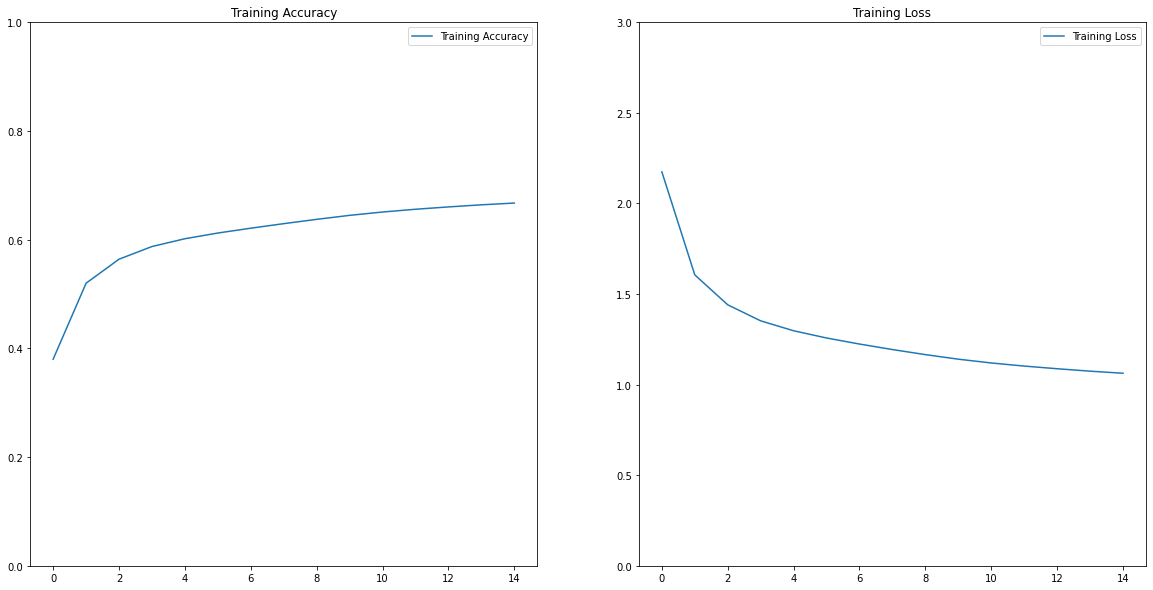

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(15)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.ylim([0,1])
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.ylim([0,3])
plt.legend()
plt.title('Training Loss')
plt.show()

In [ ]:
model = lstm_model(vocab_size,  batch_size=1)
model.load_weights(tf.train.latest_checkpoint('/content/lstm_weights'))
model.build(tf.TensorShape([1, None]))

##### shakespeare text generation

In [ ]:
start_string= "JULIET"

In [ ]:
generated_text = generate_text(
                    model, 
                    num_generate = 1000, 
                    temperature = 0.5, 
                    start_string = start_string
                    )

print(generated_text)

JULIET:
The countess of our prisoners shall be looked to
depand the armour of a courtier, strong,
As black as hateful and a dream, the wind
Will charity in triumph in the court.
This present war be wrenged by the ground;
And in the earth of heaven shall have the heart
I'll have thee cross there.

SICINIUS:
What would you win our former streets,
Yet would be sure of me and bears his oath
And labourer from your sinews of the land,
That I did see your heart to speak with him.

CANDERBY:
And so, but this is pastime in the hill.

KING JOHN:
Fear not the lady, the prince is all one:
The vengeance of the ground the field
Do the white haunt of this audience,
To have she hath enjoy the worse fortune play'd,
And these fourteen mouths of traitors are as
easily and time for a potent death of the storm,
That they shall be desperate of the mouth,
The time and with a holy tale of the earth
In the end of his fresh esteems the life
of his own right hands and to be revenged on his head,
And strike him f

<br><br><br><br><br><br><br><br><br><br><br><br>

### **Using GRU**

##### GRU model creation

In [15]:
def gru_model(vocab_size, batch_size ):
  model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, 256,
                        batch_input_shape=[batch_size, None]),
  tf.keras.layers.GRU(1024, 
                      return_sequences=True,
                      stateful=True,
                      recurrent_initializer='glorot_uniform'),
  tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [16]:
model_gru = gru_model(vocab_size , BATCH_SIZE)


##### compiling

In [17]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)



In [18]:
model_gru.compile(optimizer='adam', loss=loss,
                  metrics=['accuracy'])

##### configuring Checkpoints

In [19]:
weights_dir = './gruu_weights'
gru_checkpoint_prefix = os.path.join(weights_dir, "check_{epoch}")
gru_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath = gru_checkpoint_prefix,
save_weights_only = True,
)

In [20]:
EPOCH=15
history_gru = model_gru.fit(train_dataset, epochs= EPOCH , callbacks=[gru_checkpoint_callback])

Epoch 1/15
473/473 [==============================] - 45s 81ms/step - loss: 2.2254 - accuracy: 0.3740
Epoch 2/15
473/473 [==============================] - 39s 81ms/step - loss: 1.6458 - accuracy: 0.5108
Epoch 3/15
473/473 [==============================] - 38s 81ms/step - loss: 1.4761 - accuracy: 0.5561
Epoch 4/15
473/473 [==============================] - 39s 82ms/step - loss: 1.3871 - accuracy: 0.5793
Epoch 5/15
473/473 [==============================] - 38s 81ms/step - loss: 1.3325 - accuracy: 0.5933
Epoch 6/15
473/473 [==============================] - 39s 81ms/step - loss: 1.2929 - accuracy: 0.6037
Epoch 7/15
473/473 [==============================] - 39s 82ms/step - loss: 1.2599 - accuracy: 0.6123
Epoch 8/15
473/473 [==============================] - 39s 81ms/step - loss: 1.2297 - accuracy: 0.6206
Epoch 9/15
473/473 [==============================] - 38s 81ms/step - loss: 1.2018 - accuracy: 0.6285
Epoch 10/15
473/473 [==============================] - 38s 81ms/step - loss: 1.176

##### accuracy and loss plot

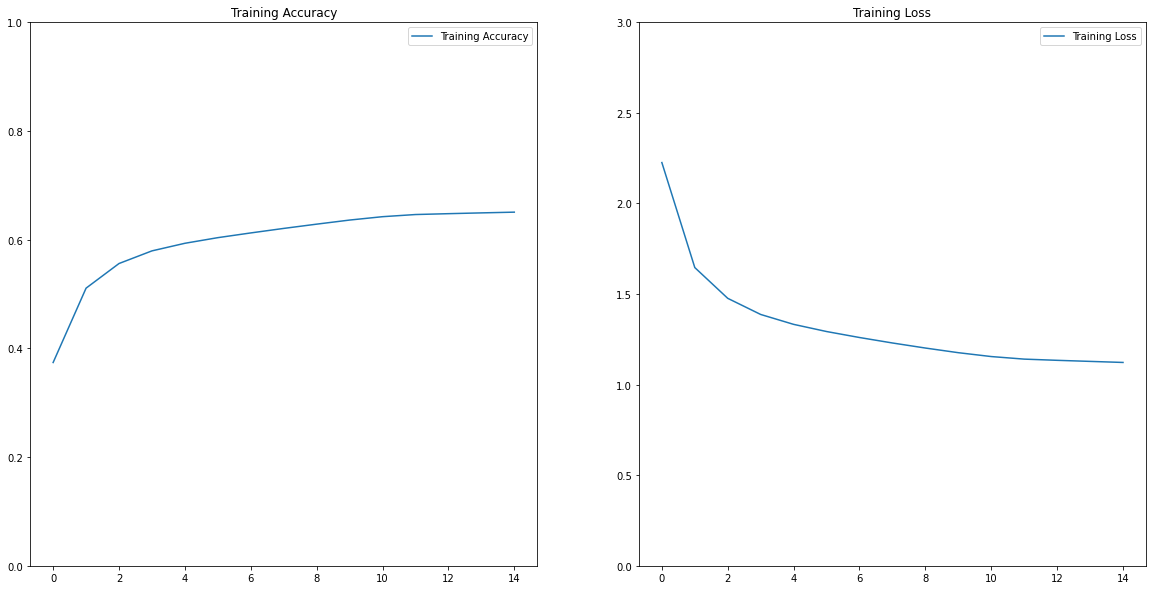

In [21]:
import matplotlib.pyplot as plt
acc = history_gru.history['accuracy']
loss = history_gru.history['loss']

epochs = range(15)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.ylim([0,1])
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.ylim([0,3])
plt.legend()
plt.title('Training Loss')
plt.show()

In [ ]:
model_gru = gru_model(vocab_size,  batch_size=1)
model_gru.load_weights(tf.train.latest_checkpoint('/content/gruu_weights'))
model_gru.build(tf.TensorShape([1, None]))

##### shakespeare text generation

In [23]:
start_string= "JULIET"

In [24]:

generated_text = generate_text(
                    model_gru, 
                    num_generate = 1000, 
                    temperature = 0.5, 
                    start_string = start_string
                    )

print(generated_text)

JULIET:
An I were black and frown of chance, sir; we will be of this prince,
To stay all with a parts to give his rest:
And you are full of spirit and the lion with the
company; and then you shall be as good as heart
As bring a boy hell have all suffer sounds
That play the word of all our housewifence and dear's passion wrongs
And play at all his remorse and dur state,
The ears of the king's and the bloody soul
Come to his purse. I would not say 'tis not for all the grave
To put the form of such an enemy,
That now is privileged, and deny it out,
And do not work his hands and red and right,
Like a dream to the rest of the world,
The first the world shall suck the fire of blood and storms
Are as he was a breast, my lord;
And he that hath an earthless eyes, with any part
Against the duke and change of a blessed shore,
And therefore might have been seen before me.

KING JOHN:
We will die as a scene in England.

MALVOLIO:
'If the rest go with me to the court,
When youth and our friends are 

## Thank you :)